In [1]:
import pandas as pd
import numpy as np
import spacy

C:\Users\pc\AppData\Local\Temp\ipykernel_21096\2696788975.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [275]:
df = pd.read_csv(r'mini-job-rec-dataset - jobs_data.csv')

In [276]:
df = df.dropna()

In [277]:
df

,job_id,job_title,specialization,job_description,skillsets,year_of_experience
0,1,Junior Accountant,Accounting & Finance,"Assists in financial record-keeping, prepares ...","Accounting principles, Excel, attention to detail",1-2
1,2,Financial Analyst,Accounting & Finance,Analyzes financial data to assist in business ...,"Financial modeling, data analysis, Excel",2-4
2,3,Tax Consultant,Accounting & Finance,Advises clients on tax planning and compliance.,"Tax law, analytical skills, communication",3-5
3,4,Audit Manager,Accounting & Finance,"Oversees auditing processes, ensures complianc...","Auditing, critical thinking, leadership",5+
5,6,Full-Stack Developer,Software Developer,Develops front-end and back-end aspects of web...,"Full-stack development, database management",3-5
6,7,Mobile App Developer,Software Developer,Specializes in creating applications for mobil...,"Mobile development, UI/UX design, Java/Kotlin",2-4
8,9,Receptionist,Admin,"Manages front desk, answers calls, and assists...","Customer service, organizational skills",0-2
10,11,Office Manager,Admin,"Oversees administrative functions, manages off...","Leadership, organization, multitasking",4+
11,12,HR Administrator,Admin,"Supports HR tasks such as recruitment, employe...","HR policies, communication, organization",2-4
12,13,Sales Representative,Sales,"Generates leads, sells products or services, a...","Sales techniques, communication, CRM software",1-3


In [291]:
import numpy as np
a = [1,3,4]
b = [True, False, True]
c = list(filter(lambda x: x == True,a))

In [292]:
c

[1]

In [5]:
df['year_of_experience'].value_counts()

year_of_experience
4+     7
2-4    6
3-5    6
1-2    4
5+     3
1-3    3
3-4    3
0-2    2
6+     1
Name: count, dtype: int64

In [5]:
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').to(device)

# Vectorize job descriptions
vectors = []

for text in df['job_description']:
    inputs = tokenizer(text, return_tensors="pt").to(device)
    outputs = model(**inputs)
    vector_representation = outputs.last_hidden_state.mean(dim=1).squeeze().detach().cpu().numpy()
    vectors.append(vector_representation)

# vectors now contains the BERT vector representations for each job description

c:\Users\pc\anaconda3\envs\chatbot\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
len(vectors)

35

In [52]:
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').to(device)

# Vectorize job descriptions
job_vectors = []

for description, skillset in zip(df['job_description'],df['skillsets']):
    inputs = tokenizer(description + " " + skillset, return_tensors="pt").to(device)
    outputs = model(**inputs)
    vector_representation = outputs.last_hidden_state.mean(dim=1).squeeze().detach().cpu().numpy()
    job_vectors.append(vector_representation)

In [57]:
# Process user input
user_input = ""
user_input_vector = []

# Vectorize user input
user_input_inputs = tokenizer(user_input, return_tensors="pt").to(device)
user_input_outputs = model(**user_input_inputs)
user_input_vector = user_input_outputs.last_hidden_state.mean(dim=1).squeeze().detach().cpu().numpy()

# Calculate cosine similarity between user input vector and job description vectors
similarities = cosine_similarity(user_input_vector.reshape(1, -1), job_vectors)

# Get indices of top-N most similar job descriptions
N = 3  # Adjust N based on the number of recommendations you want to provide
top_n_indices = similarities.argsort()[0][::-1][:N]

# Recommend top-N jobs
recommended_jobs = df.iloc[top_n_indices]

# Display the recommended jobs
print("Recommended Jobs:")
print(recommended_jobs[['job_title', 'job_description']])

Recommended Jobs:
                   job_title  \
19            Data Scientist   
28  Administrative Assistant   
24                 QA Tester   

                                      job_description  
19  Analyzes complex data sets to identify pattern...  
28  Assists in daily office needs and managing gen...  
24  Tests software applications for bugs, issues, ...  


In [56]:
similarities

array([[0.67961985, 0.6571089 , 0.6171413 , 0.5729351 , 0.6834449 ,
        0.6688309 , 0.61110896, 0.5936053 , 0.62583673, 0.63582695,
        0.6019971 , 0.5135973 , 0.5541241 , 0.6529317 , 0.5744219 ,
        0.56554693, 0.7208098 , 0.6167595 , 0.5604729 , 0.5785913 ,
        0.68897   , 0.6778604 , 0.659596  , 0.6211124 , 0.6900993 ,
        0.6832019 , 0.58836776, 0.57210565, 0.59540075, 0.6707437 ,
        0.6373858 , 0.5263089 , 0.6298267 , 0.58816403, 0.5793866 ]],
      dtype=float32)

KeyError: 'specification'

In [31]:
import pandas as pd
from transformers import RobertaTokenizer, RobertaModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained RoBERTa model and tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base').to(device)

# Vectorize job descriptions
job_vectors = []

# Tokenize all job descriptions at once
job_texts = list(df['job_description'])
job_inputs = tokenizer(job_texts, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
job_outputs = model(**job_inputs)
job_vectors = job_outputs.last_hidden_state.mean(dim=1).squeeze().detach().cpu().numpy()

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
# Process user input
user_input = "I do coding and programming"
user_input_inputs = tokenizer(user_input, return_tensors="pt").to(device)
user_input_outputs = model(**user_input_inputs)
user_input_vector = user_input_outputs.last_hidden_state.mean(dim=1).squeeze().detach().cpu().numpy()

# Calculate cosine similarity between user input vector and job description vectors
similarities = cosine_similarity(user_input_vector.reshape(1, -1), job_vectors)

# Get indices of top-N most similar job descriptions
N = 5  # Adjust N based on the number of recommendations you want to provide
top_n_indices = similarities.argsort()[0][::-1][:N]

# Recommend top-N jobs
recommended_jobs = df.iloc[top_n_indices]

# Display the recommended jobs
print("Recommended Jobs:")
print(recommended_jobs[['job_title', 'job_description']])


Recommended Jobs:
                   job_title  \
28  Administrative Assistant   
1          Financial Analyst   
26        Frontend Developer   
25         Backend Developer   
2             Tax Consultant   

                                      job_description  
28  Assists in daily office needs and managing gen...  
1   Analyzes financial data to assist in business ...  
26  Develops the user interface and front-end logi...  
25  Focuses on server-side logic, integration, and...  
2     Advises clients on tax planning and compliance.  


In [ ]:
from transformers import BertModel
import torch

class CustomBERTModel(torch.nn.Module):
    def __init__(self):
          super(CustomBERTModel, self).__init__()
          self.bert = BertModel.from_pretrained("dbmdz/bert-base-italian-xxl-cased")
          ### New layers:
          self.linear1 = torch.nn.Linear(768, 128)
          self.linear2 = torch.nn.Linear(128, 3) ## 3 is the number of classes in this example

    def forward(self, ids, mask):
          sequence_output, pooled_output = self.bert(
               ids, 
               attention_mask=mask)

          # sequence_output has the following shape: (batch_size, sequence_length, 768)
          linear1_output = self.linear1(sequence_output[:,0,:].view(-1,768)) ## extract the 1st token's embeddings

          linear2_output = self.linear2(linear1_output)

          return linear2_output

tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-italian-xxl-cased")
model = CustomBERTModel() # You can pass the parameters if required to have more flexible model
model.to(torch.device("cpu")) ## can be gpu
criterion = nn.CrossEntropyLoss() ## If required define your own criterion
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()))

for epoch in epochs:
    for batch in data_loader: ## If you have a DataLoader()  object to get the data.

        data = batch[0]
        targets = batch[1] ## assuming that data loader returns a tuple of data and its targets
        
        optimizer.zero_grad()   
        encoding = tokenizer.batch_encode_plus(data, return_tensors='pt', padding=True, truncation=True,max_length=50, add_special_tokens = True)
        outputs = model(input_ids, attention_mask=attention_mask)
        outputs = F.log_softmax(outputs, dim=1)
        input_ids = encoding['input_ids']
        attention_mask = encoding['attention_mask']
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        


In [1]:
from transformers import BertModel, AutoTokenizer
import torch
from torch.utils.data import DataLoader, TensorDataset

# Assuming you have a dataset (ids, mask, labels) to train on

class CustomBERTModel(torch.nn.Module):
    def __init__(self):
        super(CustomBERTModel, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased", 
                                              output_hidden_states=True)
        self.linear1 = torch.nn.Linear(768, 128)
        self.linear2 = torch.nn.Linear(128, 3)

    def forward(self, ids, mask):
        sequence_output, pooled_output, hidden_states = self.bert(ids, attention_mask=mask)
        linear1_output = self.linear1(sequence_output[:, 0, :].view(-1, 768))
        linear2_output = self.linear2(linear1_output)
        return linear2_output

c:\Users\pc\anaconda3\envs\chatbot\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:


# Load your dataset here (ids, mask, labels)

# Tokenize input and create DataLoader
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-italian-xxl-cased")
inputs = tokenizer(ids, return_tensors="pt", padding=True, truncation=True)
dataset = TensorDataset(inputs["input_ids"], inputs["attention_mask"], labels)
dataloader = DataLoader(dataset, batch_size=your_batch_size, shuffle=True)

# Instantiate model and set requires_grad for BERT layers
model = CustomBERTModel()
for param in model.bert.parameters():
    param.requires_grad = False

# Define loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=your_learning_rate)

# Training loop
epochs = your_number_of_epochs
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    average_loss = total_loss / len(dataloader)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {average_loss}")

# Save the trained model
torch.save(model.state_dict(), "path/to/save/model.pth")

In [27]:
import pandas as pd
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
import torch

df = pd.read_csv(r'mini-job-rec-dataset - jobs_data.csv').dropna()

In [28]:
from transformers import BertModel
import torch

class SimpleNN(torch.nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.dense1 = torch.nn.Linear(input_size, hidden_size)
        self.relu = torch.nn.ReLU()
        self.dense2 = torch.nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [29]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').to(device)

In [31]:
df["combined_description"] = df["job_title"] + " " + df['job_description'] + " " + df['skillsets']

In [32]:
tokenized_combined_description = df['combined_description'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

In [16]:
tokenized_titles = df['job_title'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))
tokenized_descriptions = df['job_description'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))
tokenized_skillsets = df['skillsets'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

In [33]:
# Label Encoding
labels = df['specialization'].astype('category').cat.codes

In [18]:
# Combine tokenized sequences
input_ids = list(zip(tokenized_titles, tokenized_descriptions, tokenized_skillsets))

# Split the data into train and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(input_ids, labels, test_size=0.2, random_state=42)

In [22]:
# Convert the data into PyTorch datasets
train_dataset = TensorDataset(torch.LongTensor(train_data), torch.LongTensor(train_labels))
val_dataset = TensorDataset(torch.LongTensor(val_data), torch.LongTensor(val_labels))

ValueError: expected sequence of length 4 at dim 2 (got 19)

In [142]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
import pandas as pd


# Device configuration (use GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)

# Your data loading and preprocessing code
df = pd.read_csv(r'mini-job-rec-dataset - jobs_data.csv').dropna()
df["specialization"] = df["specialization"].apply(lambda x: "IT & Software Developer" if x in ["IT","Software Developer"] else x)
df["combined_description"] = df['job_description'] + " " + df['skillsets']
tokenized_combined_description = df['combined_description'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))
labels = df['specialization'].astype('category').cat.codes
labels = torch.LongTensor(labels.values).to(device)

In [293]:
[1,2,3,4][0,1]

<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
C:\Users\pc\AppData\Local\Temp\ipykernel_18880\3897695999.py:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [1,2,3,4][0,1]
C:\Users\pc\AppData\Local\Temp\ipykernel_18880\3897695999.py:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [1,2,3,4][0,1]
C:\Users\pc\AppData\Local\Temp\ipykernel_18880\3897695999.py:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [1,2,3,4][0,1]


TypeError: list indices must be integers or slices, not tuple

In [144]:
# Tokenize each sequence and get hidden states
hidden_states_list = []

bert_model.eval()
with torch.no_grad():
    for sequence in df['combined_description']:
        tokenized_sequence = tokenizer.encode(sequence, add_special_tokens=True)
        input_ids = torch.LongTensor(tokenized_sequence).unsqueeze(0).to(device)  # Add batch dimension
        outputs = bert_model(input_ids)
        hidden_states = outputs['last_hidden_state']
        # Mean pooling along the sequence length dimension
        mean_pooled_states = hidden_states.mean(dim=1)
        hidden_states_list.append(mean_pooled_states)

In [145]:
# Concatenate the list of tensors into a single tensor
mean_pooled_hidden_states = torch.cat(hidden_states_list, dim=0)

In [146]:
# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [147]:
# Instantiate the model
input_size = mean_pooled_hidden_states.size(-1)  # Input size based on mean-pooled hidden size
hidden_size = 128
output_size = len(df['specialization'].unique())  # Number of unique specializations
simple_nn_model = SimpleNN(input_size, hidden_size, output_size).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(simple_nn_model.parameters(), lr=0.001)

# Training loop
num_epochs = 500

for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Forward pass
    outputs = simple_nn_model(mean_pooled_hidden_states)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}')

Epoch 1/500, Loss: 1.3923
Epoch 2/500, Loss: 1.2727
Epoch 3/500, Loss: 1.1908
Epoch 4/500, Loss: 1.1156
Epoch 5/500, Loss: 1.0413
Epoch 6/500, Loss: 0.9664
Epoch 7/500, Loss: 0.8913
Epoch 8/500, Loss: 0.8194
Epoch 9/500, Loss: 0.7513
Epoch 10/500, Loss: 0.6863
Epoch 11/500, Loss: 0.6255
Epoch 12/500, Loss: 0.5688
Epoch 13/500, Loss: 0.5158
Epoch 14/500, Loss: 0.4669
Epoch 15/500, Loss: 0.4217
Epoch 16/500, Loss: 0.3802
Epoch 17/500, Loss: 0.3424
Epoch 18/500, Loss: 0.3079
Epoch 19/500, Loss: 0.2763
Epoch 20/500, Loss: 0.2475
Epoch 21/500, Loss: 0.2214
Epoch 22/500, Loss: 0.1978
Epoch 23/500, Loss: 0.1766
Epoch 24/500, Loss: 0.1577
Epoch 25/500, Loss: 0.1409
Epoch 26/500, Loss: 0.1259
Epoch 27/500, Loss: 0.1125
Epoch 28/500, Loss: 0.1008
Epoch 29/500, Loss: 0.0904
Epoch 30/500, Loss: 0.0812
Epoch 31/500, Loss: 0.0732
Epoch 32/500, Loss: 0.0661
Epoch 33/500, Loss: 0.0598
Epoch 34/500, Loss: 0.0543
Epoch 35/500, Loss: 0.0494
Epoch 36/500, Loss: 0.0450
Epoch 37/500, Loss: 0.0412
Epoch 38/5

In [ ]:
# Save the entire model
torch.save(simple_nn_model.state_dict(), 'path/to/simple_nn_model.pth')

Training - Epoch 1/500, Loss: 1.4219
Validation - Epoch 1/500, Loss: 1.3731, Accuracy: 0.4286
Training - Epoch 2/500, Loss: 1.3995
Validation - Epoch 2/500, Loss: 1.3653, Accuracy: 0.4286
Training - Epoch 3/500, Loss: 1.3780
Validation - Epoch 3/500, Loss: 1.3585, Accuracy: 0.4286
Training - Epoch 4/500, Loss: 1.3573
Validation - Epoch 4/500, Loss: 1.3521, Accuracy: 0.2857
Training - Epoch 5/500, Loss: 1.3373
Validation - Epoch 5/500, Loss: 1.3468, Accuracy: 0.7143
Training - Epoch 6/500, Loss: 1.3183
Validation - Epoch 6/500, Loss: 1.3421, Accuracy: 0.7143
Training - Epoch 7/500, Loss: 1.3006
Validation - Epoch 7/500, Loss: 1.3375, Accuracy: 0.7143
Training - Epoch 8/500, Loss: 1.2838
Validation - Epoch 8/500, Loss: 1.3336, Accuracy: 0.7143
Training - Epoch 9/500, Loss: 1.2679
Validation - Epoch 9/500, Loss: 1.3304, Accuracy: 0.7143
Training - Epoch 10/500, Loss: 1.2527
Validation - Epoch 10/500, Loss: 1.3276, Accuracy: 0.5714
Training - Epoch 11/500, Loss: 1.2380
Validation - Epoch 1

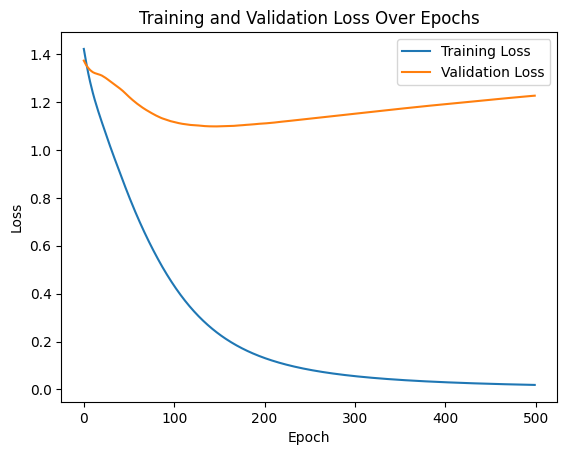

In [202]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from matplotlib import pyplot as plt

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)

# Device configuration (use GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Your data loading and preprocessing code
df = pd.read_csv(r'mini-job-rec-dataset - jobs_data.csv').dropna()
df["specialization"] = df["specialization"].apply(lambda x: "IT & Software Developer" if x in ["IT","Software Developer"] else x)
df["combined_description"] = df["job_title"] + " " + df['job_description'] + " " + df['skillsets']

# Split the data into train and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=41)

# Tokenize and get hidden states for training set
hidden_states_list_train = []
labels_train = torch.LongTensor(train_df['specialization'].astype('category').cat.codes.values).to(device)

# Tokenize and get hidden states for training set
with torch.no_grad():
    for sequence in train_df['combined_description']:
        tokenized_sequence = tokenizer.encode(sequence, add_special_tokens=True)
        input_ids = torch.LongTensor(tokenized_sequence).unsqueeze(0).to(device)  # Add batch dimension
        outputs = bert_model(input_ids)
        hidden_states = outputs['last_hidden_state']
        
        # Mean pooling along the sequence length dimension
        # mean_pooled_states = hidden_states.mean(dim=1)
        mean_pooled_states = hidden_states[:,0,:]
        
        hidden_states_list_train.append(mean_pooled_states)

# Concatenate the list of tensors into a single tensor
mean_pooled_hidden_states_train = torch.cat(hidden_states_list_train, dim=0)

# Tokenize and get hidden states for validation set
hidden_states_list_val = []
labels_val = torch.LongTensor(val_df['specialization'].astype('category').cat.codes.values).to(device)

# Tokenize and get hidden states for validation set
with torch.no_grad():
    for sequence in val_df['combined_description']:
        tokenized_sequence = tokenizer.encode(sequence, add_special_tokens=True)
        input_ids = torch.LongTensor(tokenized_sequence).unsqueeze(0).to(device)  # Add batch dimension
        outputs = bert_model(input_ids)
        hidden_states = outputs['last_hidden_state']
        
        # Mean pooling along the sequence length dimension
        # mean_pooled_states = hidden_states.mean(dim=1)
        mean_pooled_states = hidden_states[:,0,:]
        
        hidden_states_list_val.append(mean_pooled_states)

# Concatenate the list of tensors into a single tensor
mean_pooled_hidden_states_val = torch.cat(hidden_states_list_val, dim=0)

# Ensure that the number of instances in the validation set is divisible by the batch size
batch_size = 1  # Adjust as needed
num_val_instances = len(labels_val)
num_batches = (num_val_instances + batch_size - 1) // batch_size
num_padded_instances = num_batches * batch_size - num_val_instances

# Pad the validation tensors to make the number of instances divisible by the batch size
if num_padded_instances > 0:
    mean_pooled_hidden_states_val = torch.cat([mean_pooled_hidden_states_val,
                                               torch.zeros(num_padded_instances, mean_pooled_hidden_states_val.size(1)).to(device)])
    labels_val = torch.cat([labels_val, torch.zeros(num_padded_instances).to(device, dtype=torch.long)])

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Instantiate the model
input_size = mean_pooled_hidden_states_train.size(-1)  # Input size based on mean-pooled hidden size
hidden_size = 128
output_size = len(df['specialization'].unique())  # Number of unique specializations
simple_nn_model = SimpleNN(input_size, hidden_size, output_size).to(device)

# Convert labels to PyTorch tensor for validation set
labels_val = torch.LongTensor(val_df['specialization'].astype('category').cat.codes.values).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(simple_nn_model.parameters(), lr=0.0001)

# Training loop
num_epochs = 500
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training
    simple_nn_model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = simple_nn_model(mean_pooled_hidden_states_train)
    loss = criterion(outputs, labels_train)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    print(f'Training - Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}')

    # Evaluation on validation set
    simple_nn_model.eval()
    with torch.no_grad():
        val_outputs = simple_nn_model(mean_pooled_hidden_states_val)
        val_loss = criterion(val_outputs, labels_val)
        val_preds = torch.argmax(val_outputs, dim=1)
        val_accuracy = accuracy_score(labels_val.cpu().numpy(), val_preds.cpu().numpy())

    val_losses.append(val_loss.item())

    print(f'Validation - Epoch {epoch + 1}/{num_epochs}, Loss: {val_loss.item():.4f}, Accuracy: {val_accuracy:.4f}')

# Plotting
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.show()

In [164]:
# Assuming you have a new job description, title, and skillsets
new_data = "i design databases and develop backend using python"

# Tokenize and get hidden states for the new instance
with torch.no_grad():
    tokenized_sequence = tokenizer.encode(new_data, add_special_tokens=True)
    input_ids = torch.LongTensor(tokenized_sequence).unsqueeze(0).to(device)  # Add batch dimension
    outputs = bert_model(input_ids)
    hidden_states = outputs['last_hidden_state']
    
    # Mean pooling along the sequence length dimension
    mean_pooled_states = hidden_states.mean(dim=1)

# Feed forward through the trained neural network
simple_nn_model.eval()
with torch.no_grad():
    prediction_logits = simple_nn_model(mean_pooled_states)

# Get predictions
predicted_class_index = torch.argmax(prediction_logits, dim=1).item()

# Map the predicted index back to the original class label
predicted_class_label = df['specialization'].unique()[predicted_class_index]

print(f'Predicted Specialization: {predicted_class_label}')
print(prediction_logits)

Predicted Specialization: Admin
tensor([[-0.7631, -1.0110,  1.7470, -0.8096]], device='cuda:0')


In [104]:
import pandas as pd
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Example dataset
df = pd.read_csv('mini-job-rec-dataset - jobs_data.csv').dropna()

# Tokenize and obtain BERT representations
tokenized_descriptions = df['job_description'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))
max_len = max(map(len, tokenized_descriptions))
padded_sequences = [sequence + [0] * (max_len - len(sequence)) for sequence in tokenized_descriptions]
input_ids = torch.LongTensor(padded_sequences)

with torch.no_grad():
    outputs = bert_model(input_ids)
    last_hidden_states = outputs.last_hidden_state[:, 0, :].numpy()  # Using the [CLS] token representation

# Split data
X_train, X_test, y_train, y_test = train_test_split(last_hidden_states, df['specialization'], test_size=0.1, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.5000


In [111]:
import pandas as pd
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

df = pd.read_csv(r'mini-job-rec-dataset - jobs_data.csv').dropna()
df["combined_description"] = df["job_title"] + " " + df['job_description'] + " " + df['skillsets']
tokenized_combined_description = df['combined_description'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

max_len = max(map(len, tokenized_combined_description))
padded_sequences = [sequence + [0] * (max_len - len(sequence)) for sequence in tokenized_combined_description]
input_ids = torch.LongTensor(padded_sequences)

with torch.no_grad():
    outputs = bert_model(input_ids)
    last_hidden_states = outputs.last_hidden_state[:, 0, :].numpy()  # Using the [CLS] token representation

# Split data
X_train, X_test, y_train, y_test = train_test_split(last_hidden_states, df['specialization'], test_size=0.01, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# # Make predictions using the best model
# best_rf_model = grid_search.best_estimator_
# y_pred = best_rf_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.4f}')


Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy:  0.7095238095238094


In [166]:
import pandas as pd
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

df = pd.read_csv(r'mini-job-rec-dataset - jobs_data.csv').dropna()
df["combined_description"] = df["job_title"] + " " + df['job_description'] + " " + df['skillsets']
tokenized_combined_description = df['combined_description'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))
df["specialization"] = df["specialization"].apply(lambda x: "IT & Software Developer" if x in ["IT","Software Developer"] else x)

max_len = max(map(len, tokenized_combined_description))
padded_sequences = [sequence + [0] * (max_len - len(sequence)) for sequence in tokenized_combined_description]
input_ids = torch.LongTensor(padded_sequences)

with torch.no_grad():
    outputs = bert_model(input_ids)
    last_hidden_states = outputs.last_hidden_state[:, 0, :].numpy()  # Using the [CLS] token representation

# Split data
X_train, X_test, y_train, y_test = train_test_split(last_hidden_states, df['specialization'], test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} - Accuracy: {accuracy:.4f}')

Logistic Regression - Accuracy: 0.8571
Decision Tree - Accuracy: 0.7143
Random Forest - Accuracy: 0.7143
SVM - Accuracy: 0.5714
KNN - Accuracy: 0.5714
Learning rate set to 0.065937
0:	learn: 1.3672012	total: 32.7ms	remaining: 32.7s
1:	learn: 1.3506331	total: 50.5ms	remaining: 25.2s
2:	learn: 1.3352729	total: 68.4ms	remaining: 22.7s
3:	learn: 1.3147471	total: 86.2ms	remaining: 21.5s
4:	learn: 1.2983602	total: 102ms	remaining: 20.2s
5:	learn: 1.2835057	total: 117ms	remaining: 19.4s
6:	learn: 1.2694535	total: 133ms	remaining: 18.9s
7:	learn: 1.2592409	total: 149ms	remaining: 18.4s
8:	learn: 1.2416327	total: 164ms	remaining: 18.1s
9:	learn: 1.2282472	total: 180ms	remaining: 17.8s
10:	learn: 1.2145823	total: 195ms	remaining: 17.6s
11:	learn: 1.1954608	total: 211ms	remaining: 17.4s
12:	learn: 1.1750686	total: 227ms	remaining: 17.2s
13:	learn: 1.1620171	total: 242ms	remaining: 17.1s
14:	learn: 1.1487974	total: 258ms	remaining: 16.9s
15:	learn: 1.1326247	total: 273ms	remaining: 16.8s
16:	learn

In [227]:
import pandas as pd
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

df = pd.read_csv(r'mini-job-rec-dataset - jobs_data.csv').dropna()
df["combined_description"] = df["job_title"] + " " + df['job_description'] + " " + df['skillsets']
tokenized_combined_description = df['combined_description'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))
df["specialization"] = df["specialization"].apply(lambda x: "IT & Software Developer" if x in ["IT", "Software Developer"] else x)
# df["specialization"] = df["specialization"].apply(lambda x: "Sales & Admin" if x in ["Sales", "Admin"] else x)

max_len = max(map(len, tokenized_combined_description))
padded_sequences = [sequence + [0] * (max_len - len(sequence)) for sequence in tokenized_combined_description]
input_ids = torch.LongTensor(padded_sequences)

with torch.no_grad():
    outputs = bert_model(input_ids)
    # last_hidden_states = outputs.last_hidden_state[:, 0, :].numpy()  # Using the [CLS] token representation
    last_hidden_states = outputs.last_hidden_state.mean(dim=1).numpy()

# Split data
X_train, X_test, y_train, y_test = train_test_split(last_hidden_states, df['specialization'], test_size=0.2, stratify = df['specialization'], random_state = 1)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    # 'CatBoost': CatBoostClassifier(verbose=False)
}

# Train and evaluate models using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    print(f'{name} - Cross-Validation Accuracy: {scores.mean():.4f} (±{scores.std():.4f})')

# Test results on the held-out test set
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} - Test Accuracy: {accuracy:.4f}')


Logistic Regression - Cross-Validation Accuracy: 0.9333 (±0.0943)
Decision Tree - Cross-Validation Accuracy: 0.7148 (±0.0466)
Random Forest - Cross-Validation Accuracy: 0.7185 (±0.1235)
SVM - Cross-Validation Accuracy: 0.4296 (±0.0931)
KNN - Cross-Validation Accuracy: 0.6556 (±0.2859)
Logistic Regression - Test Accuracy: 1.0000
Decision Tree - Test Accuracy: 0.5714
Random Forest - Test Accuracy: 1.0000
SVM - Test Accuracy: 0.7143
KNN - Test Accuracy: 0.5714


In [228]:
# Initialize Logistic Regression model
logistic_regression_model = LogisticRegression()

# Set up a parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(logistic_regression_model, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best Parameters:", grid_search.best_params_)

# Test results on the held-out test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy with Best Model: {accuracy:.4f}')

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'C': 1, 'max_iter': 100}
Test Accuracy with Best Model: 1.0000


In [229]:
best_model

LogisticRegression(C=1)

In [296]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV

# Example function to transform text input using BERT
def text_to_bert_features(text, bert_model, tokenizer):
    with torch.no_grad():
        tokenized_input = tokenizer(text, return_tensors="pt")
        outputs = bert_model(**tokenized_input)
        return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Example function to predict using the best model
def predict_with_best_model(text, bert_model, tokenizer, best_logreg_model):
    # Transform the input text using BERT
    bert_features = text_to_bert_features(text, bert_model, tokenizer)

    # Make predictions using the best logistic regression model
    predictions = best_logreg_model.predict([bert_features])

    return predictions[0]

def predict_and_print_results(text, bert_model, tokenizer, best_logreg_model):
    # Transform the input text using BERT
    bert_features = text_to_bert_features(text, bert_model, tokenizer)

    # Make predictions using the best logistic regression model
    class_probabilities = best_logreg_model.predict_proba([bert_features])
    predicted_class = best_logreg_model.classes_[class_probabilities.argmax()]

    # Output the predicted class and its probabilities
    print(f"Predicted Class: {predicted_class}")
    print("Class Probabilities:")
    for class_label, proba in zip(best_logreg_model.classes_, class_probabilities[0]):
        print(f"  {class_label}: {proba:.4f}")

    return class_probabilities

# Example usage:
# Replace "bert-base-uncased" with your specific BERT model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")

# Assuming X_train, y_train, and best_params are available
# Replace LogisticRegression with your best model class
# best_logreg_model = LogisticRegression(**best_params)
# best_logreg_model.fit(X_train, y_train)

# Example input text
input_text = "responsible for managing every aspect of the employment process, including orientation and training new staff members"

# Make predictions using the input text and the best models
prediction = predict_with_best_model(input_text, bert_model, tokenizer, best_model)
class_probabilities = predict_and_print_results(input_text, bert_model, tokenizer, best_model)


# Output the prediction
print(f"Predicted Class: {prediction}")


Predicted Class: Admin
Class Probabilities:
  Accounting & Finance: 0.0286
  Admin: 0.8733
  IT & Software Developer: 0.0729
  Sales: 0.0252
Predicted Class: Admin


In [302]:
class_probabilities

array([[0.0286453 , 0.87326044, 0.07289464, 0.02519963]])

In [306]:
class_probabilities.argsort()[0][::-1][:2]

array([1, 2], dtype=int64)

In [305]:
N = 3  # Adjust N based on the number of recommendations you want to provide
class_probabilities.argsort()[0][::-1][:N]

array([1, 2, 0], dtype=int64)

In [257]:
with open('spec_cls.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [258]:
# Using pickle
with open('spec_cls.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [259]:
loaded_model

LogisticRegression(C=1)

In [7]:
from autocorrect import Speller

def correct_spelling(text):
    spell = Speller(lang='en')  # 'en' for English, you can change it based on your language

    # Split the text into words and correct each word
    corrected_text = ' '.join([spell(word) for word in text.split()])

    return corrected_text

# Example usage:
input_text = "I perform administrrativee tasks ffor you in 2 yeas"
corrected_text = correct_spelling(input_text)

print("Original Text:", input_text)
print("Corrected Text:", corrected_text)


Original Text: I perform administrrativee tasks ffor you in 2 yeas
Corrected Text: I perform administrative tasks for you in 2 year
